In [48]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)


In [49]:
#load data
dfs = {name: pd.read_csv(f'raw_data_files/{name}.csv') for name in ['campaigns', 'customers', 'events', 'products', 'transactions']}
#name individual dataframes
campaigns_df = dfs['campaigns']  
customers_df = dfs['customers']
events_df = dfs['events']
products_df = dfs['products']
transactions_df = dfs['transactions']

In [50]:
#shape of dataframes
for x in dfs:
    print(f"{x} shape: {dfs[x].shape}")

campaigns shape: (50, 7)
customers shape: (100000, 7)
events shape: (2000000, 12)
products shape: (2000, 6)
transactions shape: (103127, 9)


In [51]:
#data types and missing values
for x in dfs:
    print(f"\n{x} info:")
    print(dfs[x].info())    


campaigns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      50 non-null     int64  
 1   channel          50 non-null     object 
 2   objective        50 non-null     object 
 3   start_date       50 non-null     object 
 4   end_date         50 non-null     object 
 5   target_segment   50 non-null     object 
 6   expected_uplift  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB
None

customers info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   customer_id          100000 non-null  int64 
 1   signup_date          100000 non-null  object
 2   country              100000 non-null  object
 3   age                

In [52]:
#preview data
for x in dfs:
    print(f"\n{x} head:")
    print(dfs[x].head())


campaigns head:
   campaign_id      channel     objective  start_date    end_date  \
0            1  Paid Search    Cross-sell  2021-10-25  2021-11-26   
1            2        Email     Retention  2021-10-24  2021-12-24   
2            3        Email  Reactivation  2023-10-08  2023-11-30   
3            4      Display  Reactivation  2022-07-25  2022-10-07   
4            5       Social   Acquisition  2022-07-09  2022-09-29   

  target_segment  expected_uplift  
0   Deal Seekers            0.022  
1   Deal Seekers            0.116  
2     Churn Risk            0.100  
3   Deal Seekers            0.111  
4  New Customers            0.144  

customers head:
   customer_id signup_date country  age  gender loyalty_tier  \
0            1  2021-04-08      BR   48    Male       Bronze   
1            2  2023-04-28      IN   36  Female       Silver   
2            3  2022-12-18      UK   35  Female       Silver   
3            4  2022-04-26      US   45    Male       Silver   
4            5 

In [53]:
#converting dates to datetime format
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'])
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'])
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'])
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])
#check info again after date conversion
print(campaigns_df.info())
print(events_df.info())
print(transactions_df.info())       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_id      50 non-null     int64         
 1   channel          50 non-null     object        
 2   objective        50 non-null     object        
 3   start_date       50 non-null     datetime64[ns]
 4   end_date         50 non-null     datetime64[ns]
 5   target_segment   50 non-null     object        
 6   expected_uplift  50 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   event_id              int64         
 1   timestamp             datetime64[ns]
 2   customer_id           int64         
 3   session

In [66]:
#convert traffic source to title case for consistency
events_df["traffic_source"] = (
    events_df["traffic_source"]
    .str.strip()
    .str.title()
)

events_df['traffic_source'].value_counts()

traffic_source
Organic        800489
Paid Search    399838
Social         300271
Email          299640
Direct         199762
Name: count, dtype: int64

In [67]:
#adding campaign period column
campaigns_df['campaign_period'] = campaigns_df['end_date'] - campaigns_df['start_date']
campaigns_df.head()

,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift,campaign_period
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022,32 days
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116,61 days
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100,53 days
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111,74 days
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144,82 days


Univariate Analysis

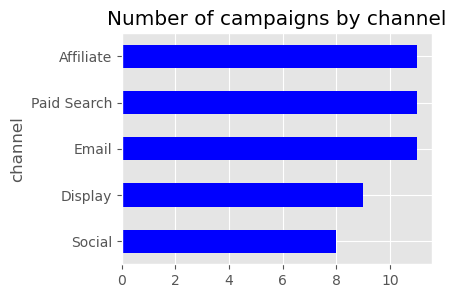

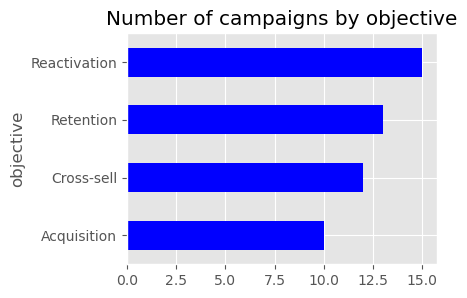

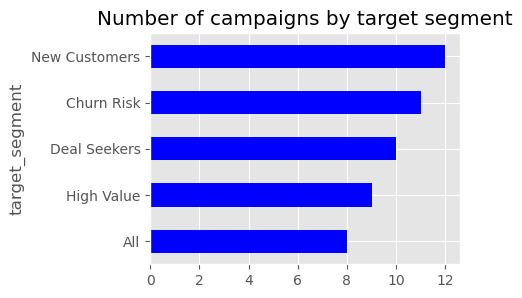

In [68]:
#campaigns_df univariate analysis
campaigns_df['channel'].value_counts() \
    .sort_values() \
    .plot(kind='barh', title='Number of campaigns by channel', figsize=(4,3), color='blue')
plt.show()
campaigns_df['objective'].value_counts() \
    .sort_values() \
    .plot(kind='barh', title='Number of campaigns by objective', figsize=(4,3), color='blue')
plt.show()
campaigns_df['target_segment'].value_counts() \
    .sort_values() \
    .plot(kind='barh', title='Number of campaigns by target segment', figsize=(4,3), color='blue')
plt.show()  

In [69]:
print(campaigns_df[['channel','objective','target_segment']].value_counts())

channel      objective     target_segment
Paid Search  Cross-sell    Deal Seekers      3
Affiliate    Cross-sell    High Value        2
Email        Reactivation  Churn Risk        2
Social       Retention     All               2
Paid Search  Cross-sell    High Value        2
Email        Acquisition   Churn Risk        2
Affiliate    Acquisition   New Customers     2
Display      Reactivation  Deal Seekers      2
Affiliate    Reactivation  All               1
             Retention     New Customers     1
                           Churn Risk        1
                           All               1
             Reactivation  New Customers     1
                           High Value        1
                           Churn Risk        1
Display      Cross-sell    New Customers     1
             Acquisition   High Value        1
             Retention     New Customers     1
                           High Value        1
Email        Cross-sell    Churn Risk        1
             Acqui

In [70]:
customers_df.head()

,customer_id,signup_date,country,age,gender,loyalty_tier,acquisition_channel
0,1,2021-04-08,BR,48,Male,Bronze,Referral
1,2,2023-04-28,IN,36,Female,Silver,Organic
2,3,2022-12-18,UK,35,Female,Silver,Organic
3,4,2022-04-26,US,45,Male,Silver,Paid Search
4,5,2022-04-20,IN,53,Male,Silver,Organic


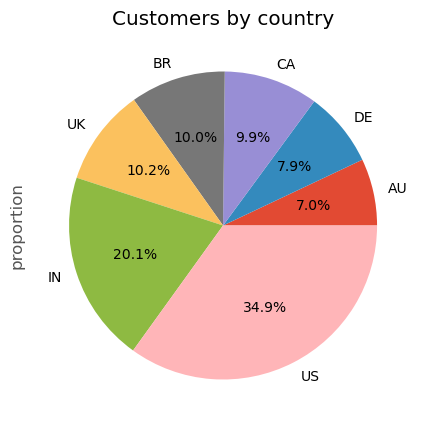

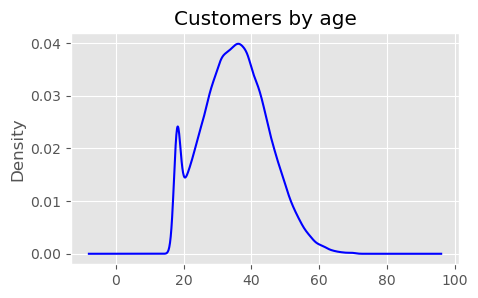

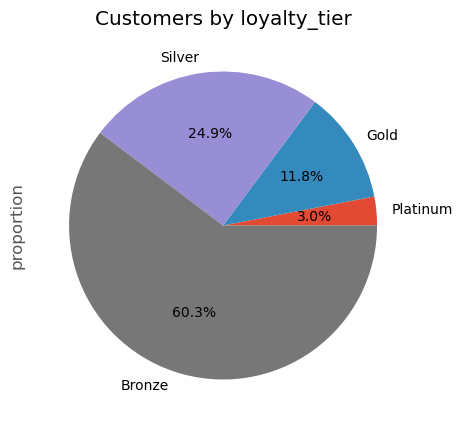

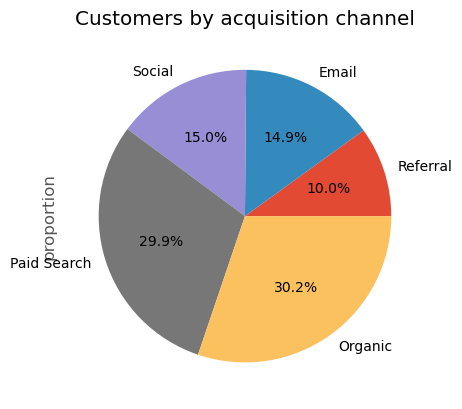

In [71]:
#customers univariate analysis
customers_df['country'].value_counts(normalize=True) \
    .sort_values() \
    .plot(kind='pie', title='Customers by country', \
          figsize=(6,5), autopct='%1.1f%%')
plt.show()
customers_df['age'].plot(kind='kde', title='Customers by age', color='blue', figsize=(5,3))
plt.show()
customers_df['loyalty_tier'].value_counts(normalize=True) \
    .sort_values() \
    .plot(kind='pie', title='Customers by loyalty_tier', \
          figsize=(6,5), autopct='%1.1f%%')
plt.show()
customers_df['acquisition_channel'].value_counts(normalize=True) \
    .sort_values() \
    .plot(kind='pie', title='Customers by acquisition channel', \
          figsize=(6,4.75), autopct='%1.1f%%')
plt.show()


In [72]:
#events funnel visualization
import plotly.express as px

#Prepare the data
counts_df = events_df['event_type'].value_counts().reset_index()
counts_df.columns = ['event', 'count']

#Define custom order
custom_order = ['purchase', 'add_to_cart','click', 'view', 'bounce'] 

# Create the funnel using category_orders
fig = px.funnel(
    counts_df, 
    x='count', 
    y='event',
    category_orders={'event': custom_order},
    title='Event Funnel'
)

fig.show()


In [74]:
fig = px.funnel(
    funnel_df,
    x="count",
    y="event_type",
    facet_col="traffic_source",
    facet_col_wrap=2,   #wrap after 3 columns
    category_orders={"event_type": custom_order},
    title="Event Funnels by Traffic Source"
)

fig.update_layout(
    height=1200,        
    width=800,        
    margin=dict(t=80)
)

fig.show()

funnel stage	Full	Direct	Email	Organic	Paid Search	Social
views	1043573	107740	150240	430833	201321	153439
click	379008	38987	54591	156328	73653	55449
add_to_cart	28437	29368	40922	117858	54516	41706
purchase	103127	4200	26636	16755	33633	21903
conversion (views to purchase)	9.9%	3.9%	17.7%	3.9%	16.7%	14.3%

traffic_source Email has the highest conversion @ 17.7% followed by Paid Search @ 16.7%. It is recommended to increase acquistion through these channels.

In [75]:
products_df.head()

,product_id,category,brand,base_price,launch_date,is_premium
0,1,Grocery,Brand_58,14.19,2021-08-02,0
1,2,Fashion,Brand_1,25.80,2021-09-14,0
2,3,Electronics,Brand_70,165.46,2021-01-18,1
3,4,Fashion,Brand_56,75.45,2023-03-03,1
4,5,Sports,Brand_1,72.50,2022-04-19,1


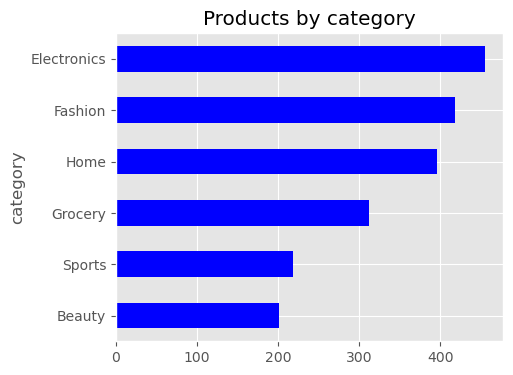

In [76]:
products_df['category'].value_counts() \
    .sort_values() \
    .plot(kind='barh', title='Products by category', figsize=(5,4), color='blue')
plt.show()

In [77]:
events_df.isna().sum()

event_id                     0
timestamp                    0
customer_id                  0
session_id                   0
event_type                   0
product_id              200371
device_type              40300
traffic_source               0
campaign_id                  0
page_category                0
session_duration_sec         0
experiment_group             0
dtype: int64

In [78]:
#checking for duplicate rows in events_df
events_df.loc[events_df.duplicated()]

,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group


In [79]:
#checking for duplicate values in event_id and session_id
print(events_df['event_id'].duplicated().sum())

0


In [80]:
print(events_df['session_id'].duplicated().sum())

1366538


In [81]:
events_df.duplicated(subset=['event_id', 'session_id']).sum()

np.int64(0)

In [82]:
events_df[events_df["session_id"] == 220126]

,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group
2,3,2021-12-27 08:25:15,59540,220126,purchase,1630.0,mobile,Organic,0,PDP,190.7,Variant_A
101241,101242,2022-03-07 22:33:11,49019,220126,view,1601.0,NaN,Organic,0,PLP,128.3,Control
1688906,1688907,2023-04-10 03:24:33,36169,220126,add_to_cart,817.0,mobile,Paid Search,8,PLP,73.9,Control
1832352,1832353,2023-05-29 07:06:49,91421,220126,bounce,NaN,desktop,Social,8,Cart,75.8,Control
1929228,1929229,2023-11-13 12:27:08,39913,220126,add_to_cart,619.0,desktop,Organic,0,PDP,20.8,Variant_B


In [83]:
transactions_df.head()

,transaction_id,timestamp,customer_id,product_id,quantity,discount_applied,gross_revenue,campaign_id,refund_flag
0,1,2021-12-27 08:25:15,59540,1630.0,3,0.00,43.74,0,0
1,2,2023-06-06 21:14:26,54871,1901.0,3,0.00,174.78,21,0
2,3,2023-08-31 05:29:54,51818,1884.0,1,0.00,40.61,37,0
3,4,2022-06-26 20:33:46,18164,1114.0,2,0.15,68.76,13,0
4,5,2023-07-26 18:12:35,86915,408.0,1,0.00,14.64,4,0


In [84]:
#remove all refunded transactions and rows with missing gross_revenue
consolidated_df = transactions_df.query('refund_flag == False')
consolidated_df = consolidated_df.dropna(subset=['gross_revenue']).reset_index(drop=True)
#calculating net revenue
consolidated_df['net_revenue'] = consolidated_df['gross_revenue'] - consolidated_df['discount_applied']
print(consolidated_df.info())
net_revenue_total = consolidated_df['net_revenue'].sum()
print(f"Total Net Revenue: ${round(net_revenue_total,2)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89974 entries, 0 to 89973
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    89974 non-null  int64         
 1   timestamp         89974 non-null  datetime64[ns]
 2   customer_id       89974 non-null  int64         
 3   product_id        89974 non-null  float64       
 4   quantity          89974 non-null  int64         
 5   discount_applied  89974 non-null  float64       
 6   gross_revenue     89974 non-null  float64       
 7   campaign_id       89974 non-null  int64         
 8   refund_flag       89974 non-null  int64         
 9   net_revenue       89974 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 6.9 MB
None
Total Net Revenue: $8626555.86


In [85]:
campaigns_df.head()

,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift,campaign_period
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022,32 days
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116,61 days
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100,53 days
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111,74 days
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144,82 days


In [86]:
#create consolidated file for campaign wise revenue analysis
consolidated_df = pd.merge(consolidated_df, campaigns_df, on='campaign_id', how='left')

In [87]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89974 entries, 0 to 89973
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transaction_id    89974 non-null  int64          
 1   timestamp         89974 non-null  datetime64[ns] 
 2   customer_id       89974 non-null  int64          
 3   product_id        89974 non-null  float64        
 4   quantity          89974 non-null  int64          
 5   discount_applied  89974 non-null  float64        
 6   gross_revenue     89974 non-null  float64        
 7   campaign_id       89974 non-null  int64          
 8   refund_flag       89974 non-null  int64          
 9   net_revenue       89974 non-null  float64        
 10  channel           71735 non-null  object         
 11  objective         71735 non-null  object         
 12  start_date        71735 non-null  datetime64[ns] 
 13  end_date          71735 non-null  datetime64[ns] 
 14  target

In [88]:
#calculate campaign wise net revenue
campaign_revenue = consolidated_df.groupby('campaign_id')['net_revenue'].sum().reset_index()

In [89]:
#campaign wise summary
campaign_sumary = pd.merge(campaigns_df, campaign_revenue, on='campaign_id', how='left')
campaign_sumary['daily_net_revenue'] = (campaign_sumary['net_revenue'] / campaign_sumary['campaign_period']. \
                                        dt.days).map('{:.2f}'.format)
#top 5 campaigns by net revenue
top_campaigns = campaign_sumary[['campaign_id','channel','objective','target_segment', \
                                 'campaign_period','net_revenue','daily_net_revenue']]. \
                                sort_values(by='net_revenue', ascending=False).head()
top_campaigns

,campaign_id,channel,objective,target_segment,campaign_period,net_revenue,daily_net_revenue
4,5,Social,Acquisition,New Customers,82 days,191588.20,2336.44
17,18,Affiliate,Retention,All,59 days,191126.03,3239.42
28,29,Email,Acquisition,New Customers,62 days,186213.14,3003.44
43,44,Affiliate,Reactivation,All,76 days,183494.01,2414.39
6,7,Paid Search,Cross-sell,High Value,39 days,176805.78,4533.48
